# dataset: doctor visits
## data preprocessing and cleaning

In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('NPHA-doctor-visits.csv')

df.columns

Index(['Number of Doctors Visited', 'Age', 'Phyiscal Health', 'Mental Health',
       'Dental Health', 'Employment', 'Stress Keeps Patient from Sleeping',
       'Medication Keeps Patient from Sleeping',
       'Pain Keeps Patient from Sleeping',
       'Bathroom Needs Keeps Patient from Sleeping',
       'Uknown Keeps Patient from Sleeping', 'Trouble Sleeping',
       'Prescription Sleep Medication', 'Race', 'Gender'],
      dtype='object')

In [3]:
# Check for missing values
missing_values = df.isnull().sum()

missing_values

Number of Doctors Visited                     0
Age                                           0
Phyiscal Health                               0
Mental Health                                 0
Dental Health                                 0
Employment                                    0
Stress Keeps Patient from Sleeping            0
Medication Keeps Patient from Sleeping        0
Pain Keeps Patient from Sleeping              0
Bathroom Needs Keeps Patient from Sleeping    0
Uknown Keeps Patient from Sleeping            0
Trouble Sleeping                              0
Prescription Sleep Medication                 0
Race                                          0
Gender                                        0
dtype: int64

In [4]:
# Ensure all columns are of integer type
df = df.astype(int)

df.head()

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
0,3,2,4,3,3,3,0,0,0,0,1,2,3,1,2
1,2,2,4,2,3,3,1,0,0,1,0,3,3,1,1
2,3,2,3,2,3,3,0,0,0,0,1,3,3,4,1
3,1,2,3,2,3,3,0,0,0,1,0,3,3,4,2
4,3,2,3,3,3,3,1,0,0,0,0,2,3,1,2


In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()  # or MinMaxScaler()
df_scaled = scaler.fit_transform(df.drop('Number of Doctors Visited', axis=1))


In [6]:
X = df.drop('Number of Doctors Visited', axis=1)  # Features
y = df['Number of Doctors Visited']               # Target


In [7]:
from sklearn.utils import shuffle

# Shuffle the dataset
df_shuffled = shuffle(df, random_state=42)


In [8]:
from sklearn.model_selection import train_test_split

# Separate the features and the target variable
X = df_shuffled.drop('Number of Doctors Visited', axis=1)
y = df_shuffled['Number of Doctors Visited']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Linear SVM

In [9]:
from sklearn.svm import SVC

# Initialize the Linear SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [10]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.4825174825174825
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.48      1.00      0.65        69
           3       0.00      0.00      0.00        47

    accuracy                           0.48       143
   macro avg       0.16      0.33      0.22       143
weighted avg       0.23      0.48      0.31       143



## cross validation

### varying training and testing partitions, multiple rounds for each partition, and hyperparameter tuning

Partition 20.0% Train / 80.0% Test
Average Training Scores: [0.528169014084507, 0.528169014084507, 0.5422535211267606, 0.5422535211267606]
Average Testing Scores: [0.5192219679633868, 0.5086956521739131, 0.5104042715484363, 0.510419527078566]
Best Training Score: 0.5422535211267606 at C = 1
Best Testing Score: 0.5192219679633868 at C = 0.01


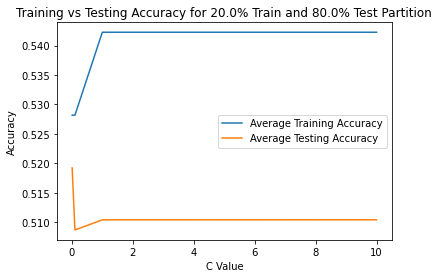

Partition 50.0% Train / 50.0% Test
Average Training Scores: [0.5574229691876751, 0.5574229691876751, 0.5574229691876751, 0.5574229691876751]
Average Testing Scores: [0.48458528951486696, 0.5041862284820031, 0.49855242566510166, 0.49573552425665107]
Best Training Score: 0.5574229691876751 at C = 0.01
Best Testing Score: 0.5041862284820031 at C = 0.1


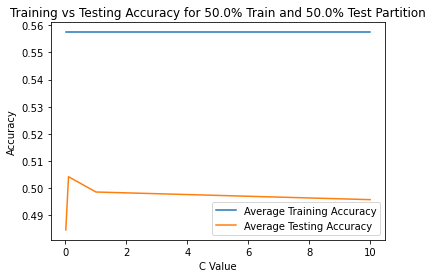

Partition 80.0% Train / 20.0% Test
Average Training Scores: [0.5306479859894921, 0.5306479859894921, 0.5306479859894921, 0.5306479859894921]
Average Testing Scores: [0.482512315270936, 0.47536945812807874, 0.4194581280788177, 0.4268472906403941]
Best Training Score: 0.5306479859894921 at C = 0.01
Best Testing Score: 0.482512315270936 at C = 0.01


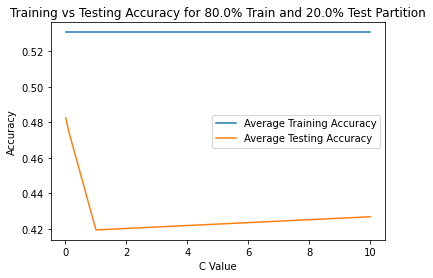

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

partitions = [(0.2, 0.8), (0.5, 0.5), (0.8, 0.2)]
n_rounds = 3
C_values = [0.01, 0.1, 1, 10]

for train_size, test_size in partitions:
    avg_train_scores = []
    avg_test_scores = []

    best_train_score = 0
    best_test_score = 0
    best_C_train = None
    best_C_test = None

    for C in C_values:
        round_train_scores = []
        round_test_scores = []

        for _ in range(n_rounds):
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=42)

            svm = SVC(kernel='linear', C=C)
            svm.fit(X_train, y_train)

            # Training score
            train_score = svm.score(X_train, y_train)
            round_train_scores.append(train_score)

            # Cross-validated test score
            test_scores = cross_val_score(svm, X_test, y_test, cv=5)
            round_test_scores.append(np.mean(test_scores))

        avg_train_score = np.mean(round_train_scores)
        avg_test_score = np.mean(round_test_scores)

        avg_train_scores.append(avg_train_score)
        avg_test_scores.append(avg_test_score)

        # Update best scores and corresponding C values
        if avg_train_score > best_train_score:
            best_train_score = avg_train_score
            best_C_train = C

        if avg_test_score > best_test_score:
            best_test_score = avg_test_score
            best_C_test = C

    # Print average scores for the current partition
    print(f"Partition {train_size * 100}% Train / {test_size * 100}% Test")
    print("Average Training Scores:", avg_train_scores)
    print("Average Testing Scores:", avg_test_scores)
    print(f"Best Training Score: {best_train_score} at C = {best_C_train}")
    print(f"Best Testing Score: {best_test_score} at C = {best_C_test}")

    # Plotting
    plt.plot(C_values, avg_train_scores, label='Average Training Accuracy')
    plt.plot(C_values, avg_test_scores, label='Average Testing Accuracy')
    plt.title(f'Training vs Testing Accuracy for {train_size * 100}% Train and {test_size * 100}% Test Partition')
    plt.xlabel('C Value')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


## KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Range of n_neighbors to test
neighbors_settings = range(1, 11)  # Testing 1 to 10 neighbors

best_accuracy = 0

for n_neighbors in neighbors_settings:
    # Build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Update best accuracy and best n_neighbors
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_neighbors = n_neighbors

print(f'Best n_neighbors: {best_n_neighbors}, Best Accuracy: {best_accuracy:.2f}')



Best n_neighbors: 6, Best Accuracy: 0.50


In [13]:
# Rebuild the model using the best n_neighbors
knn_best = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn_best.fit(X_train, y_train)

# Predict on the test set
y_pred_best = knn_best.predict(X_test)

# Calculate and print the accuracy
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f'Accuracy with Best n_neighbors ({best_n_neighbors}): {best_accuracy:.2f}')

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_best))


Accuracy with Best n_neighbors (6): 0.50
Classification Report:
              precision    recall  f1-score   support

           1       0.27      0.22      0.24        27
           2       0.55      0.78      0.64        69
           3       0.50      0.23      0.32        47

    accuracy                           0.50       143
   macro avg       0.44      0.41      0.40       143
weighted avg       0.48      0.50      0.46       143



## cross validation

### detailed analysis using K-Nearest Neighbors (KNN) with varying training and testing partitions, multiple rounds for each partition, and hyperparameter tuning

Partition 20.0% Train / 80.0% Test
Average Training Scores: [0.988262910798122, 0.687793427230047, 0.6830985915492956, 0.6314553990610329, 0.6103286384976526, 0.5915492957746479, 0.57981220657277, 0.5892018779342723, 0.5868544600938966, 0.5751173708920186]
Average Testing Scores: [0.3938977879481312, 0.39629290617848967, 0.4108975336892957, 0.4440833968980422, 0.45450800915331807, 0.438189677091279, 0.4586371726417493, 0.4679023646071701, 0.4649733028222731, 0.47847444698703284]
Best Training Score: 0.988262910798122 at n_neighbors = 1
Best Testing Score: 0.47847444698703284 at n_neighbors = 10


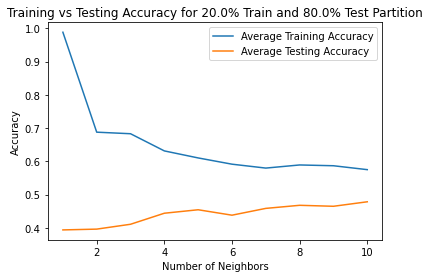

Partition 50.0% Train / 50.0% Test
Average Training Scores: [0.9533146591970122, 0.69187675070028, 0.6638655462184874, 0.6507936507936508, 0.6050420168067228, 0.6041083099906629, 0.5929038281979458, 0.6003734827264239, 0.5798319327731093, 0.5704948646125118]
Average Testing Scores: [0.40799426186750126, 0.38204225352112675, 0.43415492957746477, 0.4415232133541993, 0.4342201356285864, 0.42385237350026084, 0.4648800208659363, 0.46322378716744916, 0.5042123109024518, 0.4603547209181012]
Best Training Score: 0.9533146591970122 at n_neighbors = 1
Best Testing Score: 0.5042123109024518 at n_neighbors = 9


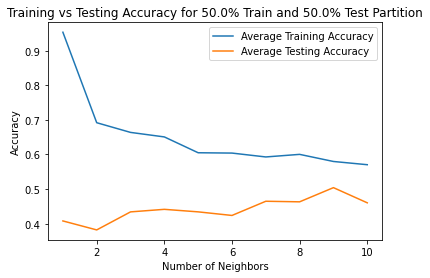

Partition 80.0% Train / 20.0% Test
Average Training Scores: [0.9474605954465849, 0.6847635726795097, 0.6870986573263281, 0.6398131932282545, 0.6193812025685932, 0.6012842965557501, 0.5913601868067717, 0.5720957384705195, 0.5755983654407472, 0.5785172212492703]
Average Testing Scores: [0.41912972085385886, 0.40788177339901477, 0.42167487684729066, 0.43801313628899835, 0.5036124794745485, 0.5013957307060756, 0.40977011494252874, 0.4641215106732348, 0.48694581280788185, 0.4261904761904762]
Best Training Score: 0.9474605954465849 at n_neighbors = 1
Best Testing Score: 0.5036124794745485 at n_neighbors = 5


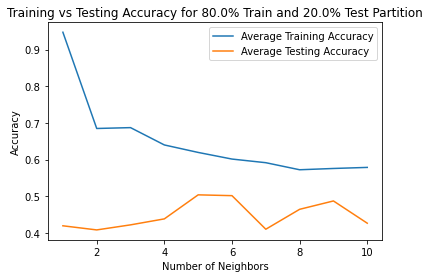

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

partitions = [(0.2, 0.8), (0.5, 0.5), (0.8, 0.2)]
n_rounds = 3
n_neighbors_range = range(1, 11)  # Example range for hyperparameter tuning

for train_size, test_size in partitions:
    avg_train_scores = []
    avg_test_scores = []

    best_train_score = 0
    best_test_score = 0
    best_n_neighbor_train = 0
    best_n_neighbor_test = 0

    for n_neighbors in n_neighbors_range:
        round_train_scores = []
        round_test_scores = []

        for _ in range(n_rounds):
            X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=train_size, test_size=test_size)

            knn = KNeighborsClassifier(n_neighbors=n_neighbors)
            knn.fit(X_train, y_train)

            # Training score
            train_score = knn.score(X_train, y_train)
            round_train_scores.append(train_score)

            # Cross-validated test score
            test_scores = cross_val_score(knn, X_test, y_test, cv=5)
            round_test_scores.append(np.mean(test_scores))

        avg_train_score = np.mean(round_train_scores)
        avg_test_score = np.mean(round_test_scores)

        avg_train_scores.append(avg_train_score)
        avg_test_scores.append(avg_test_score)

        # Update best scores and corresponding n_neighbors
        if avg_train_score > best_train_score:
            best_train_score = avg_train_score
            best_n_neighbor_train = n_neighbors

        if avg_test_score > best_test_score:
            best_test_score = avg_test_score
            best_n_neighbor_test = n_neighbors

    # Print average scores and best scores for the current partition
    print(f"Partition {train_size * 100}% Train / {test_size * 100}% Test")
    print("Average Training Scores:", avg_train_scores)
    print("Average Testing Scores:", avg_test_scores)
    print(f"Best Training Score: {best_train_score} at n_neighbors = {best_n_neighbor_train}")
    print(f"Best Testing Score: {best_test_score} at n_neighbors = {best_n_neighbor_test}")

    # Plotting
    plt.plot(n_neighbors_range, avg_train_scores, label='Average Training Accuracy')
    plt.plot(n_neighbors_range, avg_test_scores, label='Average Testing Accuracy')
    plt.title(f'Training vs Testing Accuracy for {train_size * 100}% Train and {test_size * 100}% Test Partition')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


# Decision trees

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [16]:
# Assuming X and y are already defined and are your feature set and target variable respectively

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [18]:
# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.32
              precision    recall  f1-score   support

           1       0.22      0.30      0.25        27
           2       0.44      0.42      0.43        69
           3       0.22      0.19      0.20        47

    accuracy                           0.32       143
   macro avg       0.29      0.30      0.30       143
weighted avg       0.33      0.32      0.32       143



## Cross validation

### varying training and testing partitions, multiple rounds for each partition, and hyperparameter tuning

Partition 20.0% Train / 80.0% Test
Average Training Scores: [0.5704225352112676, 0.6690140845070424, 0.8192488262910796]
Average Testing Scores: [0.48948893974065594, 0.4767454869056699, 0.44998728705822527]
Best Training Score: 0.8192488262910796 at max_depth = 10
Best Testing Score: 0.48948893974065594 at max_depth = 3


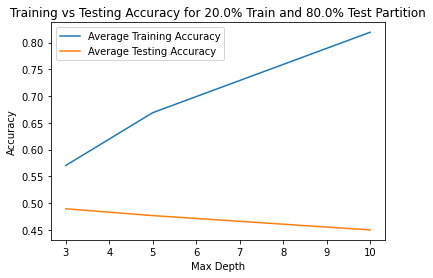

Partition 50.0% Train / 50.0% Test
Average Training Scores: [0.5686274509803921, 0.6246498599439776, 0.8580765639589168]
Average Testing Scores: [0.4566118935837246, 0.45758998435054776, 0.4456311945748566]
Best Training Score: 0.8580765639589168 at max_depth = 10
Best Testing Score: 0.45758998435054776 at max_depth = 5


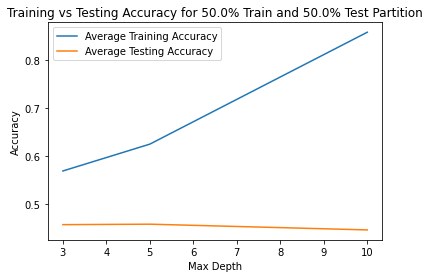

Partition 80.0% Train / 20.0% Test
Average Training Scores: [0.5499124343257443, 0.5954465849387041, 0.7437244600116754]
Average Testing Scores: [0.42019704433497534, 0.479064039408867, 0.37323481116584567]
Best Training Score: 0.7437244600116754 at max_depth = 10
Best Testing Score: 0.479064039408867 at max_depth = 5


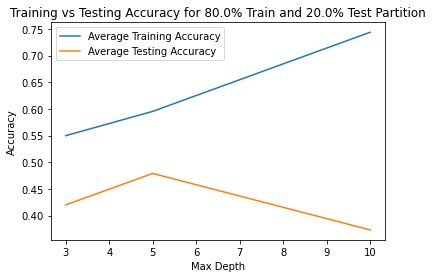

In [19]:
# Modified code to include tracking and printing of the best training and testing accuracy

import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

partitions = [(0.2, 0.8), (0.5, 0.5), (0.8, 0.2)]
n_rounds = 3
max_depth_values = [3, 5, 10]  # Example values for max_depth

for train_size, test_size in partitions:
    avg_train_scores = []
    avg_test_scores = []

    best_train_score = 0
    best_test_score = 0
    best_max_depth_train = None
    best_max_depth_test = None

    for max_depth in max_depth_values:
        round_train_scores = []
        round_test_scores = []

        for _ in range(n_rounds):
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=42)

            tree = DecisionTreeClassifier(max_depth=max_depth)
            tree.fit(X_train, y_train)

            # Training score
            train_score = tree.score(X_train, y_train)
            round_train_scores.append(train_score)

            # Cross-validated test score
            test_scores = cross_val_score(tree, X_test, y_test, cv=5)
            round_test_scores.append(np.mean(test_scores))

        avg_train_score = np.mean(round_train_scores)
        avg_test_score = np.mean(round_test_scores)

        avg_train_scores.append(avg_train_score)
        avg_test_scores.append(avg_test_score)

        # Update best scores and corresponding max_depth
        if avg_train_score > best_train_score:
            best_train_score = avg_train_score
            best_max_depth_train = max_depth

        if avg_test_score > best_test_score:
            best_test_score = avg_test_score
            best_max_depth_test = max_depth

    # Print average scores and best scores for the current partition
    print(f"Partition {train_size * 100}% Train / {test_size * 100}% Test")
    print("Average Training Scores:", avg_train_scores)
    print("Average Testing Scores:", avg_test_scores)
    print(f"Best Training Score: {best_train_score} at max_depth = {best_max_depth_train}")
    print(f"Best Testing Score: {best_test_score} at max_depth = {best_max_depth_test}")

    # Plotting
    plt.plot(max_depth_values, avg_train_scores, label='Average Training Accuracy')
    plt.plot(max_depth_values, avg_test_scores, label='Average Testing Accuracy')
    plt.title(f'Training vs Testing Accuracy for {train_size * 100}% Train and {test_size * 100}% Test Partition')
    plt.xlabel('Max Depth')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()



# dataset: car

## data cleaning and preprocessing

In [20]:
import pandas as pd

# Define feature names
feature_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Load the dataset
car = pd.read_csv('car.data', header=None, names=feature_names)

# Explore unique values for each feature
for feature in feature_names:
    unique_values = car[feature].unique()
    print(f"{feature}: {unique_values}")


buying: ['vhigh' 'high' 'med' 'low']
maint: ['vhigh' 'high' 'med' 'low']
doors: ['2' '3' '4' '5more']
persons: ['2' '4' 'more']
lug_boot: ['small' 'med' 'big']
safety: ['low' 'med' 'high']
class: ['unacc' 'acc' 'vgood' 'good']


In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for feature in feature_names:
    le = LabelEncoder()
    car[feature] = le.fit_transform(car[feature])
    label_encoders[feature] = le  # Store encoder for each feature


In [22]:
car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [23]:
# Check for missing values
missing_values = car.isnull().sum()
print(missing_values)

# If missing values exist, handle them. For example, you can drop or impute them.
# car.dropna(inplace=True)  # Option to drop rows with missing values
# or
# car.fillna(method='ffill', inplace=True)  # Option to forward-fill missing values


buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


In [24]:
from sklearn.preprocessing import StandardScaler

# Separating features and the target variable
X = car.drop('class', axis=1)  # Assuming 'class' is the target variable
y = car['class']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Linear SVM

In [25]:
from sklearn.svm import SVC

# Initialize the Linear SVM model
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [26]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.6965317919075145
              precision    recall  f1-score   support

           0       0.48      0.12      0.19        83
           1       0.00      0.00      0.00        11
           2       0.71      0.98      0.83       235
           3       0.00      0.00      0.00        17

    accuracy                           0.70       346
   macro avg       0.30      0.28      0.25       346
weighted avg       0.60      0.70      0.61       346



Partition 20.0% Train / 80.0% Test
Average Training Scores: [0.6579710144927536, 0.6579710144927536, 0.6927536231884058, 0.7043478260869566]
Average Testing Scores: [0.7107727724585361, 0.7107727724585361, 0.7339036258044264, 0.7339062418249359]
Best Training Score: 0.7043478260869566 at C = 10
Best Testing Score: 0.7339062418249359 at C = 10


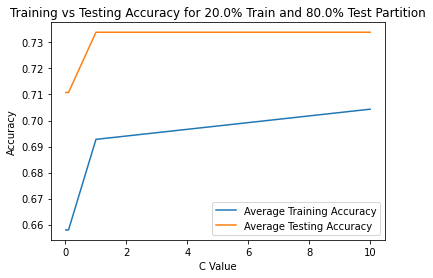

Partition 50.0% Train / 50.0% Test
Average Training Scores: [0.6875, 0.6909722222222222, 0.7233796296296297, 0.7291666666666666]
Average Testing Scores: [0.7129654523457454, 0.7129654523457454, 0.7349307702648206, 0.7349307702648206]
Best Training Score: 0.7291666666666666 at C = 10
Best Testing Score: 0.7349307702648206 at C = 1


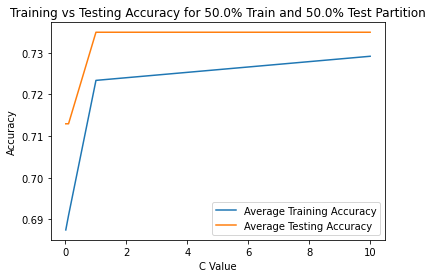

Partition 80.0% Train / 20.0% Test
Average Training Scores: [0.7054992764109985, 0.7062228654124457, 0.7308248914616499, 0.732272069464544]
Average Testing Scores: [0.6792132505175982, 0.6792132505175982, 0.6821946169772257, 0.6764803312629399]
Best Training Score: 0.732272069464544 at C = 10
Best Testing Score: 0.6821946169772257 at C = 1


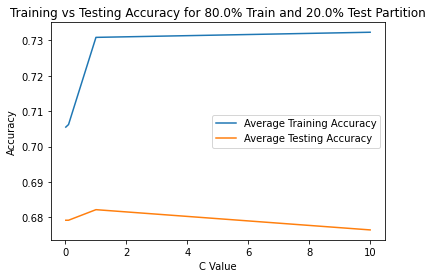

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

partitions = [(0.2, 0.8), (0.5, 0.5), (0.8, 0.2)]
n_rounds = 3
C_values = [0.01, 0.1, 1, 10]

for train_size, test_size in partitions:
    avg_train_scores = []
    avg_test_scores = []

    best_train_score = 0
    best_test_score = 0
    best_C_train = None
    best_C_test = None

    for C in C_values:
        round_train_scores = []
        round_test_scores = []

        for _ in range(n_rounds):
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=42)

            svm = SVC(kernel='linear', C=C)
            svm.fit(X_train, y_train)

            # Training score
            train_score = svm.score(X_train, y_train)
            round_train_scores.append(train_score)

            # Cross-validated test score
            test_scores = cross_val_score(svm, X_test, y_test, cv=5)
            round_test_scores.append(np.mean(test_scores))

        avg_train_score = np.mean(round_train_scores)
        avg_test_score = np.mean(round_test_scores)

        avg_train_scores.append(avg_train_score)
        avg_test_scores.append(avg_test_score)

        # Update best scores and corresponding C values
        if avg_train_score > best_train_score:
            best_train_score = avg_train_score
            best_C_train = C

        if avg_test_score > best_test_score:
            best_test_score = avg_test_score
            best_C_test = C

    # Print average scores for the current partition
    print(f"Partition {train_size * 100}% Train / {test_size * 100}% Test")
    print("Average Training Scores:", avg_train_scores)
    print("Average Testing Scores:", avg_test_scores)
    print(f"Best Training Score: {best_train_score} at C = {best_C_train}")
    print(f"Best Testing Score: {best_test_score} at C = {best_C_test}")

    # Plotting
    plt.plot(C_values, avg_train_scores, label='Average Training Accuracy')
    plt.plot(C_values, avg_test_scores, label='Average Testing Accuracy')
    plt.title(f'Training vs Testing Accuracy for {train_size * 100}% Train and {test_size * 100}% Test Partition')
    plt.xlabel('C Value')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


## KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Range of n_neighbors to test
neighbors_settings = range(1, 11)  # Testing 1 to 10 neighbors

best_accuracy = 0

for n_neighbors in neighbors_settings:
    # Build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Update best accuracy and best n_neighbors
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_neighbors = n_neighbors

print(f'Best n_neighbors: {best_n_neighbors}, Best Accuracy: {best_accuracy:.2f}')


Best n_neighbors: 5, Best Accuracy: 0.94


In [29]:
from sklearn.preprocessing import StandardScaler
# Rebuild the model using the best n_neighbors
knn_best = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn_best.fit(X_train, y_train)

# Predict on the test set
y_pred_best = knn_best.predict(X_test)

# Calculate and print the accuracy
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f'Accuracy with Best n_neighbors ({best_n_neighbors}): {best_accuracy:.2f}')

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_best))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is your feature set


Accuracy with Best n_neighbors (5): 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        83
           1       1.00      0.55      0.71        11
           2       0.96      1.00      0.98       235
           3       0.87      0.76      0.81        17

    accuracy                           0.94       346
   macro avg       0.93      0.79      0.84       346
weighted avg       0.94      0.94      0.93       346



Partition 20.0% Train / 80.0% Test
Average Training Scores: [1.0, 0.9024154589371981, 0.9391304347826086, 0.9140096618357488, 0.918840579710145, 0.8792270531400966, 0.8840579710144928, 0.8666666666666667, 0.8521739130434783, 0.8502415458937197]
Average Testing Scores: [0.9043207938750241, 0.8510429201764942, 0.9062514170111093, 0.8763537906137184, 0.927224053436579, 0.9187804112384241, 0.9173381119307975, 0.9018948708557876, 0.9067205566891644, 0.8965965573170093]
Best Training Score: 1.0 at n_neighbors = 1
Best Testing Score: 0.927224053436579 at n_neighbors = 5


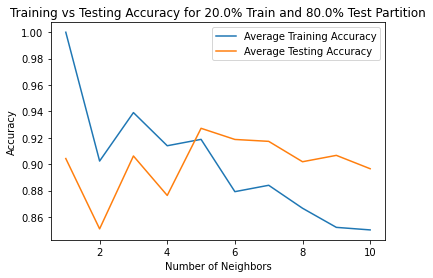

Partition 50.0% Train / 50.0% Test
Average Training Scores: [1.0, 0.9351851851851851, 0.9637345679012346, 0.9386574074074074, 0.9583333333333334, 0.9471450617283951, 0.945601851851852, 0.9232253086419754, 0.9263117283950617, 0.9124228395061728]
Average Testing Scores: [0.8541806694448177, 0.8009073800241969, 0.8869382085405745, 0.8615360487520723, 0.8780705291929918, 0.8599587758211228, 0.8777030962943048, 0.8607250078415557, 0.8414190975489536, 0.8433660438230944]
Best Training Score: 1.0 at n_neighbors = 1
Best Testing Score: 0.8869382085405745 at n_neighbors = 3


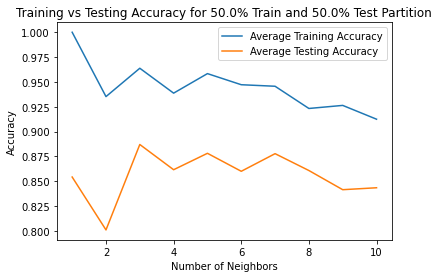

Partition 80.0% Train / 20.0% Test
Average Training Scores: [1.0, 0.9517607332368548, 0.969126869271587, 0.936565364206464, 0.9821514712976364, 0.9693680656054028, 0.9710564399421129, 0.9722624216111916, 0.9688856729377714, 0.9614085865894838]
Average Testing Scores: [0.7870393374741201, 0.7438095238095238, 0.8304347826086956, 0.7697446514837819, 0.7929054520358868, 0.7735817805383022, 0.8015044858523118, 0.8083643892339545, 0.7928778467908902, 0.7861145617667358]
Best Training Score: 1.0 at n_neighbors = 1
Best Testing Score: 0.8304347826086956 at n_neighbors = 3


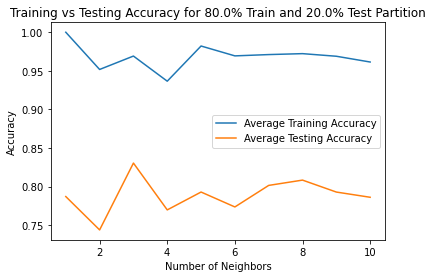

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

partitions = [(0.2, 0.8), (0.5, 0.5), (0.8, 0.2)]
n_rounds = 3
n_neighbors_range = range(1, 11)  # Example range for hyperparameter tuning

for train_size, test_size in partitions:
    avg_train_scores = []
    avg_test_scores = []

    best_train_score = 0
    best_test_score = 0
    best_n_neighbor_train = 0
    best_n_neighbor_test = 0

    for n_neighbors in n_neighbors_range:
        round_train_scores = []
        round_test_scores = []

        for _ in range(n_rounds):
            X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=train_size, test_size=test_size)

            knn = KNeighborsClassifier(n_neighbors=n_neighbors)
            knn.fit(X_train, y_train)

            # Training score
            train_score = knn.score(X_train, y_train)
            round_train_scores.append(train_score)

            # Cross-validated test score
            test_scores = cross_val_score(knn, X_test, y_test, cv=5)
            round_test_scores.append(np.mean(test_scores))

        avg_train_score = np.mean(round_train_scores)
        avg_test_score = np.mean(round_test_scores)

        avg_train_scores.append(avg_train_score)
        avg_test_scores.append(avg_test_score)

        # Update best scores and corresponding n_neighbors
        if avg_train_score > best_train_score:
            best_train_score = avg_train_score
            best_n_neighbor_train = n_neighbors

        if avg_test_score > best_test_score:
            best_test_score = avg_test_score
            best_n_neighbor_test = n_neighbors

    # Print average scores and best scores for the current partition
    print(f"Partition {train_size * 100}% Train / {test_size * 100}% Test")
    print("Average Training Scores:", avg_train_scores)
    print("Average Testing Scores:", avg_test_scores)
    print(f"Best Training Score: {best_train_score} at n_neighbors = {best_n_neighbor_train}")
    print(f"Best Testing Score: {best_test_score} at n_neighbors = {best_n_neighbor_test}")

    # Plotting
    plt.plot(n_neighbors_range, avg_train_scores, label='Average Training Accuracy')
    plt.plot(n_neighbors_range, avg_test_scores, label='Average Testing Accuracy')
    plt.title(f'Training vs Testing Accuracy for {train_size * 100}% Train and {test_size * 100}% Test Partition')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


## decision trees

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Assuming X and y are already defined and are your feature set and target variable respectively

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [32]:
# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))



Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        83
           1       0.62      0.91      0.74        11
           2       1.00      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.90      0.94      0.91       346
weighted avg       0.98      0.97      0.98       346



Partition 20.0% Train / 80.0% Test
Average Training Scores: [0.744927536231884, 0.8376811594202899, 1.0]
Average Testing Scores: [0.7910139695495214, 0.8647935959817925, 0.9547027328694256]
Best Training Score: 1.0 at max_depth = 10
Best Testing Score: 0.9547027328694256 at max_depth = 10


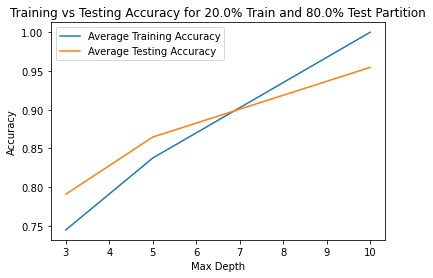

Partition 50.0% Train / 50.0% Test
Average Training Scores: [0.7662037037037037, 0.8668981481481483, 0.9918981481481483]
Average Testing Scores: [0.8009745933593226, 0.8553569028095174, 0.9378903974548551]
Best Training Score: 0.9918981481481483 at max_depth = 10
Best Testing Score: 0.9378903974548551 at max_depth = 10


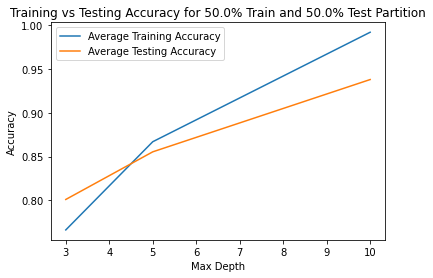

Partition 80.0% Train / 20.0% Test
Average Training Scores: [0.7785817655571635, 0.8733719247467439, 0.9905933429811867]
Average Testing Scores: [0.806376811594203, 0.8526708074534163, 0.9201380262249828]
Best Training Score: 0.9905933429811867 at max_depth = 10
Best Testing Score: 0.9201380262249828 at max_depth = 10


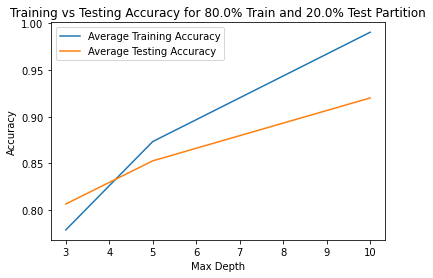

In [33]:
# Modified code to include tracking and printing of the best training and testing accuracy

import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

partitions = [(0.2, 0.8), (0.5, 0.5), (0.8, 0.2)]
n_rounds = 3
max_depth_values = [3, 5, 10]  # Example values for max_depth

for train_size, test_size in partitions:
    avg_train_scores = []
    avg_test_scores = []

    best_train_score = 0
    best_test_score = 0
    best_max_depth_train = None
    best_max_depth_test = None

    for max_depth in max_depth_values:
        round_train_scores = []
        round_test_scores = []

        for _ in range(n_rounds):
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=42)

            tree = DecisionTreeClassifier(max_depth=max_depth)
            tree.fit(X_train, y_train)

            # Training score
            train_score = tree.score(X_train, y_train)
            round_train_scores.append(train_score)

            # Cross-validated test score
            test_scores = cross_val_score(tree, X_test, y_test, cv=5)
            round_test_scores.append(np.mean(test_scores))

        avg_train_score = np.mean(round_train_scores)
        avg_test_score = np.mean(round_test_scores)

        avg_train_scores.append(avg_train_score)
        avg_test_scores.append(avg_test_score)

        # Update best scores and corresponding max_depth
        if avg_train_score > best_train_score:
            best_train_score = avg_train_score
            best_max_depth_train = max_depth

        if avg_test_score > best_test_score:
            best_test_score = avg_test_score
            best_max_depth_test = max_depth

    # Print average scores and best scores for the current partition
    print(f"Partition {train_size * 100}% Train / {test_size * 100}% Test")
    print("Average Training Scores:", avg_train_scores)
    print("Average Testing Scores:", avg_test_scores)
    print(f"Best Training Score: {best_train_score} at max_depth = {best_max_depth_train}")
    print(f"Best Testing Score: {best_test_score} at max_depth = {best_max_depth_test}")

    # Plotting
    plt.plot(max_depth_values, avg_train_scores, label='Average Training Accuracy')
    plt.plot(max_depth_values, avg_test_scores, label='Average Testing Accuracy')
    plt.title(f'Training vs Testing Accuracy for {train_size * 100}% Train and {test_size * 100}% Test Partition')
    plt.xlabel('Max Depth')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()



# dataset: adult
## data cleaning and preprocessing


In [34]:
data_file = 'adult.data'
feature_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                 'marital-status', 'occupation', 'relationship', 'race', 
                 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
                 'native-country', 'income']
adult = pd.read_csv(data_file, header=None, names=feature_names)

adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [35]:
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 
                        'relationship', 'race', 'sex', 'native-country']


# One-hot encode the categorical features
adult = pd.get_dummies(adult, columns=categorical_features)

# Separate features and target variable
X = adult.drop('income', axis=1)
y = (adult['income'] == ' <=50K').astype(int)
y[y == 0] = -1


In [36]:
import numpy as np

# Replace symbols or strings indicating missing values with NaN
adult.replace('?', np.nan, inplace=True)

# Check for missing values
print(adult.isnull().sum())


age                                0
fnlwgt                             0
education-num                      0
capital-gain                       0
capital-loss                       0
                                  ..
native-country_ Thailand           0
native-country_ Trinadad&Tobago    0
native-country_ United-States      0
native-country_ Vietnam            0
native-country_ Yugoslavia         0
Length: 109, dtype: int64


In [37]:
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features
X[numerical_features] = scaler.fit_transform(X[numerical_features])


In [38]:
X.shape, y.shape

((32561, 108), (32561,))

## Linear SVM

## cross validation

In [39]:
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your feature set and target variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.svm import SVC

# Initialize the Linear SVM model with class weights
svm_model = SVC(kernel='linear', class_weight='balanced')




In [40]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
svm_model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7930293259634577
              precision    recall  f1-score   support

          -1       0.55      0.86      0.67      1571
           1       0.95      0.77      0.85      4942

    accuracy                           0.79      6513
   macro avg       0.75      0.82      0.76      6513
weighted avg       0.85      0.79      0.81      6513



In [42]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

param_grid = {'C': [0.01, 0.1, 1, 10]}
svm_classifier = SVC(kernel='linear', class_weight='balanced')

# Perform GridSearchCV with different train-test splits
for train_size in [0.2, 0.5, 0.8]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
    svm_clf = GridSearchCV(svm_classifier, param_grid, cv=3)
    svm_clf.fit(X_train, y_train)

    # Best model evaluation
    best_model = svm_clf.best_estimator_
    best_C = svm_clf.best_params_['C']
    print(f"Train size: {train_size}, Best C: {best_C}")

    # Evaluate on the training set
    train_accuracy = best_model.score(X_train, y_train)
    print(f"Training Accuracy with C={best_C}: {train_accuracy:.2f}")

    # Evaluate on the testing set
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Testing Accuracy with C={best_C}: {test_accuracy:.2f}")

    # Classification report on the testing set
    print(classification_report(y_test, y_pred))


Train size: 0.2, Best C: 1
Training Accuracy with C=1: 0.81
Testing Accuracy with C=1: 0.79
              precision    recall  f1-score   support

          -1       0.55      0.85      0.67      6273
           1       0.94      0.77      0.85     19776

    accuracy                           0.79     26049
   macro avg       0.74      0.81      0.76     26049
weighted avg       0.85      0.79      0.81     26049

Train size: 0.5, Best C: 10
Training Accuracy with C=10: 0.80
Testing Accuracy with C=10: 0.79
              precision    recall  f1-score   support

          -1       0.54      0.86      0.66      3925
           1       0.94      0.77      0.85     12356

    accuracy                           0.79     16281
   macro avg       0.74      0.81      0.76     16281
weighted avg       0.85      0.79      0.80     16281

Train size: 0.8, Best C: 1
Training Accuracy with C=1: 0.79
Testing Accuracy with C=1: 0.79
              precision    recall  f1-score   support

          -1

# KNN

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [45]:
# Range of n_neighbors to test
neighbors_settings = range(1, 11)  # Testing 1 to 10 neighbors

best_accuracy = 0

for n_neighbors in neighbors_settings:
    # Build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Update best accuracy and best n_neighbors
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_neighbors = n_neighbors

print(f'Best n_neighbors: {best_n_neighbors}, Best Accuracy: {best_accuracy:.2f}')


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5499b50f70>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5499dde1f0>
Traceback 

Best n_neighbors: 9, Best Accuracy: 0.83


In [46]:
# Rebuild the model using the best n_neighbors
knn_best = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn_best.fit(X_train, y_train)

# Predict on the test set
y_pred_best = knn_best.predict(X_test)

# Calculate and print the accuracy
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f'Accuracy with Best n_neighbors ({best_n_neighbors}): {best_accuracy:.2f}')

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_best))


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5499dde1f0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Accuracy with Best n_neighbors (9): 0.83
Classification Report:
              precision    recall  f1-score   support

          -1       0.69      0.57      0.62      1571
           1       0.87      0.92      0.89      4942

    accuracy                           0.83      6513
   macro avg       0.78      0.74      0.76      6513
weighted avg       0.83      0.83      0.83      6513



In [47]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

partitions = [(0.2, 0.8), (0.5, 0.5), (0.8, 0.2)]
n_rounds = 3
n_neighbors_range = range(1, 11)  # Example range for hyperparameter tuning

for train_size, test_size in partitions:
    avg_train_scores = []
    avg_test_scores = []

    best_train_score = 0
    best_test_score = 0
    best_n_neighbor_train = 0
    best_n_neighbor_test = 0

    for n_neighbors in n_neighbors_range:
        round_train_scores = []
        round_test_scores = []

        for _ in range(n_rounds):
            X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=train_size, test_size=test_size)

            knn = KNeighborsClassifier(n_neighbors=n_neighbors)
            knn.fit(X_train, y_train)

            # Training score
            train_score = knn.score(X_train, y_train)
            round_train_scores.append(train_score)

            # Cross-validated test score
            test_scores = cross_val_score(knn, X_test, y_test, cv=5)
            round_test_scores.append(np.mean(test_scores))

        avg_train_score = np.mean(round_train_scores)
        avg_test_score = np.mean(round_test_scores)

        avg_train_scores.append(avg_train_score)
        avg_test_scores.append(avg_test_score)

        # Update best scores and corresponding n_neighbors
        if avg_train_score > best_train_score:
            best_train_score = avg_train_score
            best_n_neighbor_train = n_neighbors

        if avg_test_score > best_test_score:
            best_test_score = avg_test_score
            best_n_neighbor_test = n_neighbors

    # Print average scores and best scores for the current partition
    print(f"Partition {train_size * 100}% Train / {test_size * 100}% Test")
    print("Average Training Scores:", avg_train_scores)
    print("Average Testing Scores:", avg_test_scores)
    print(f"Best Training Score: {best_train_score} at n_neighbors = {best_n_neighbor_train}")
    print(f"Best Testing Score: {best_test_score} at n_neighbors = {best_n_neighbor_test}")


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f549b3d70d0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5499dce820>
Traceback 

Partition 20.0% Train / 80.0% Test
Average Training Scores: [1.0, 0.8933763308763308, 0.8918918918918918, 0.870904995904996, 0.868038493038493, 0.8557534807534807, 0.8589782964782966, 0.8531941031941033, 0.8511977886977887, 0.8487407862407862]
Average Testing Scores: [0.7884626674119687, 0.7670543759650205, 0.8126863847416015, 0.8041894565326734, 0.8217207164085685, 0.8170756160869758, 0.8261480898199349, 0.8213880032185056, 0.8277604426710156, 0.8233969873737159]
Best Training Score: 1.0 at n_neighbors = 1
Best Testing Score: 0.8277604426710156 at n_neighbors = 9


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5499a00790>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5499a00f70>
Traceback 

Partition 50.0% Train / 50.0% Test
Average Training Scores: [0.999979524979525, 0.8960483210483211, 0.8942874692874693, 0.8720106470106471, 0.8726863226863227, 0.8620802620802621, 0.8638001638001637, 0.8545045045045044, 0.8556715806715807, 0.8506756756756756]
Average Testing Scores: [0.7877691267620651, 0.7566491010227577, 0.8115187612040544, 0.8028170535232247, 0.8151217047287052, 0.8144255603190206, 0.8219806354209179, 0.8186227509224132, 0.8244170497010535, 0.8216530225203851]
Best Training Score: 0.999979524979525 at n_neighbors = 1
Best Testing Score: 0.8244170497010535 at n_neighbors = 9


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5499dce8b0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f549b3d70d0>
Traceback 

Partition 80.0% Train / 20.0% Test
Average Training Scores: [0.9999744062244064, 0.8964731777231778, 0.894374488124488, 0.875, 0.8765612203112202, 0.8652359746109747, 0.865875819000819, 0.8595669533169533, 0.8583384520884522, 0.8563165438165438]
Average Testing Scores: [0.7802856773470493, 0.7543372869493732, 0.8067976967563529, 0.7905217350641064, 0.8123242318820761, 0.8044424246068095, 0.8143209239067434, 0.8078715509012838, 0.8179536844156953, 0.813194137440913]
Best Training Score: 0.9999744062244064 at n_neighbors = 1
Best Testing Score: 0.8179536844156953 at n_neighbors = 9


## decision tree

In [48]:
# Assuming X and y are already defined and are your feature set and target variable respectively

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [49]:
# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.82
              precision    recall  f1-score   support

          -1       0.62      0.65      0.64      1571
           1       0.89      0.88      0.88      4942

    accuracy                           0.82      6513
   macro avg       0.76      0.76      0.76      6513
weighted avg       0.82      0.82      0.82      6513



In [50]:

# Modified code to include tracking and printing of the best training and testing accuracy

import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

partitions = [(0.2, 0.8), (0.5, 0.5), (0.8, 0.2)]
n_rounds = 3
max_depth_values = [3, 5, 10]  # Example values for max_depth

for train_size, test_size in partitions:
    avg_train_scores = []
    avg_test_scores = []

    best_train_score = 0
    best_test_score = 0
    best_max_depth_train = None
    best_max_depth_test = None

    for max_depth in max_depth_values:
        round_train_scores = []
        round_test_scores = []

        for _ in range(n_rounds):
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=42)

            tree = DecisionTreeClassifier(max_depth=max_depth)
            tree.fit(X_train, y_train)

            # Training score
            train_score = tree.score(X_train, y_train)
            round_train_scores.append(train_score)

            # Cross-validated test score
            test_scores = cross_val_score(tree, X_test, y_test, cv=5)
            round_test_scores.append(np.mean(test_scores))

        avg_train_score = np.mean(round_train_scores)
        avg_test_score = np.mean(round_test_scores)

        avg_train_scores.append(avg_train_score)
        avg_test_scores.append(avg_test_score)

        # Update best scores and corresponding max_depth
        if avg_train_score > best_train_score:
            best_train_score = avg_train_score
            best_max_depth_train = max_depth

        if avg_test_score > best_test_score:
            best_test_score = avg_test_score
            best_max_depth_test = max_depth

    # Print average scores and best scores for the current partition
    print(f"Partition {train_size * 100}% Train / {test_size * 100}% Test")
    print("Average Training Scores:", avg_train_scores)
    print("Average Testing Scores:", avg_test_scores)
    print(f"Best Training Score: {best_train_score} at max_depth = {best_max_depth_train}")
    print(f"Best Testing Score: {best_test_score} at max_depth = {best_max_depth_test}")

  



Partition 20.0% Train / 80.0% Test
Average Training Scores: [0.847051597051597, 0.8602579852579852, 0.8915847665847666]
Average Testing Scores: [0.8416575647223105, 0.8446646810782118, 0.8511651729308015]
Best Training Score: 0.8915847665847666 at max_depth = 10
Best Testing Score: 0.8511651729308015 at max_depth = 10
Partition 50.0% Train / 50.0% Test
Average Training Scores: [0.8454545454545453, 0.8566953316953317, 0.875982800982801]
Average Testing Scores: [0.84153248833169, 0.844460416259618, 0.8497628996400873]
Best Training Score: 0.875982800982801 at max_depth = 10
Best Testing Score: 0.8497628996400873 at max_depth = 10
Partition 80.0% Train / 20.0% Test
Average Training Scores: [0.8435580466830467, 0.8484720515970516, 0.8725813882063882]
Average Testing Scores: [0.846663436498309, 0.849477848393502, 0.845332269185412]
Best Training Score: 0.8725813882063882 at max_depth = 10
Best Testing Score: 0.849477848393502 at max_depth = 5
